In [17]:
import torch
import numpy as np
import pandas as pd
import os
import glob

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objects as go

In [4]:
data_path = './trackml/raw'
event_particles_file = 'event000021000-particles.csv.gz'
particles_filepath = os.path.join(data_path, event_particles_file)
particles = pd.read_csv(particles_filepath, header=0, compression='gzip')
particles

particle_id  particle_type         vx          vy          vz  \
0        4503668346847232           -211   0.040512    0.027287     6.03927   
1        4503805785800704            321   0.040512    0.027287     6.03927   
2        4503874505277440            211   0.040512    0.027287     6.03927   
3        4503943224754176           -211   0.040512    0.027287     6.03927   
4        4504011944230912            321   0.040512    0.027287     6.03927   
...                   ...            ...        ...         ...         ...   
12665  981804509976068096           -321  -0.077258   -0.031452   174.40200   
12666  981804578695544832            211  -0.077258   -0.031452   174.40200   
12667  981808220827811840           -211  -0.071101    0.309412   175.17900   
12668  981808220844593153           -211  40.747400  650.102000  1218.50000   
12669  981808220844597250            211  40.747400  650.102000  1218.50000   

              px        py          pz  q  nhits  
0      -0.505992 -1.595230    1.728730 -1     11  
1      30.096700  8.197130  109.326000  1     10  
2      24.123200  6.502430   88.157500  1     10  
3       0.634312 -0.058675    2.102420 -1     12  
4       2.902970  1.100720    9.260090  1     13  
...          ...       ...         ... ..    ...  
12665  -2.166440 -0.082725   -1.768100 -1     12  
12666  -0.829764 -0.317760   -0.123488  1     11  
12667   0.282236  1.499240    2.439830 -1     10  
12668   0.168532 -0.073222   -0.021175 -1      0  
12669  -0.038376 -0.204486   -0.085612  1      2  

[12670 rows x 10 columns]

In [5]:
event_hits_file = 'event000021000-hits.csv.gz'
hits_filepath = os.path.join(data_path, event_hits_file)
hits = pd.read_csv(hits_filepath, header=0, compression='gzip')
hits

hit_id         x          y       z  volume_id  layer_id  module_id
0            1  -86.7962  -14.73040 -1502.5          7         2          1
1            2  -68.7035  -10.89900 -1502.5          7         2          1
2            3  -56.1383   -9.50887 -1502.5          7         2          1
3            4  -60.3114   -4.97231 -1502.5          7         2          1
4            5  -89.4057   -8.81687 -1502.5          7         2          1
...        ...       ...        ...     ...        ...       ...        ...
125571  125572 -752.1660   71.00610  2944.5         18        12         97
125572  125573 -826.3960   51.57930  2944.5         18        12         97
125573  125574 -884.3330  118.04100  2952.5         18        12         98
125574  125575 -987.7320  130.85800  2952.5         18        12         98
125575  125576 -926.3450  112.80800  2952.5         18        12         98

[125576 rows x 7 columns]

In [6]:
event_truth_file = 'event000021000-truth.csv.gz'
truth_filepath = os.path.join(data_path, event_truth_file)
truth = pd.read_csv(truth_filepath, header=0, compression='gzip')
truth

hit_id         particle_id        tx         ty      tz  \
0            1  238697583478833152  -86.8066  -14.74600 -1502.5   
1            2  671044522095935488  -68.7054  -10.91280 -1502.5   
2            3  774632811083595776  -56.1431   -9.52382 -1502.5   
3            4  945760182355361792  -60.3115   -4.98039 -1502.5   
4            5  837680800685096960  -89.3897   -8.82342 -1502.5   
...        ...                 ...       ...        ...     ...   
125571  125572   18015223143202816 -749.6390   70.80840  2944.5   
125572  125573  391826086842859520 -822.1110   51.35170  2944.5   
125573  125574   45036683468472320 -886.5950  118.19500  2952.5   
125574  125575   45043143099285504 -983.0540  130.57200  2952.5   
125575  125576                   0 -922.3010  112.60200  2952.5   

                  tpx          tpy           tpz    weight  
0           -0.247412    -0.068921      -4.57010  0.000006  
1           -0.526919    -0.108128     -11.91400  0.000007  
2           -1.053290    -0.156064     -28.25100  0.000017  
3           -1.179080    -0.120229     -30.25350  0.000016  
4           -1.395490    -0.106162     -23.75290  0.000018  
...               ...          ...           ...       ...  
125571      -1.248830     0.212344       4.91288  0.000016  
125572      -1.556270    -0.004852       5.71218  0.000024  
125573      -0.299813     0.142721       1.03105  0.000006  
125574      -0.389299    -0.057846       1.27523  0.000007  
125575  292356.000000 -1982.910000  956307.00000  0.000000  

[125576 rows x 9 columns]

In [7]:
# take the data corresponding to only 500 particles
sampled_tracks = particles['particle_id'].unique().tolist()[:500]
indices = particles['particle_id'].isin(sampled_tracks)
particles = particles[indices]

In [8]:
indices = truth['particle_id'].isin(particles["particle_id"])
truth = truth[indices]
hits = hits[indices]

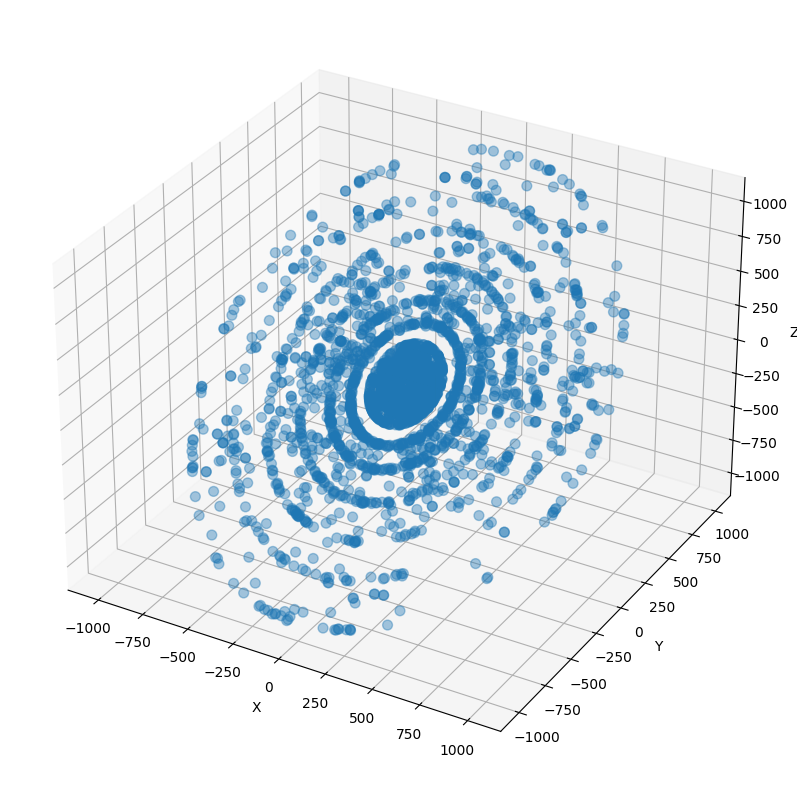

In [9]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(hits['x'], hits['y'], hits['y'], s=50, alpha=0.4)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [10]:
hit_coords = []

hit_coords.append(go.Scatter3d(
    x=hits['x'],
    y=hits['y'],
    z=hits['z'],
    mode='markers',
    marker=dict(size=4, opacity=0.4),  # Add transparency to the points
))

# Combine traces to create the figure
fig = go.Figure(data=hit_coords)

# Set axes labels
fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z',
    aspectmode='manual',  # manually define aspect ratio
    aspectratio=dict(x=1.5, y=1.5, z=1)
))

fig.show()

In [12]:
merged = hits.merge(truth, left_on='hit_id', right_on='hit_id')
merged = merged.merge(particles, left_on='particle_id', right_on='particle_id')

In [13]:
merged

hit_id         x         y       z  volume_id  layer_id  module_id  \
0        136 -124.4520  -85.5850 -1502.0          7         2         11   
1       1727 -107.3770  -75.1006 -1302.0          7         4         11   
2       3620  -90.5351  -64.3412 -1102.0          7         6         11   
3       3679  -90.2065  -64.0855 -1098.0          7         6         13   
4       5877  -78.4702  -56.3844  -957.5          7         8          9   
...      ...       ...       ...     ...        ...       ...        ...   
3984  115222 -518.5210  638.1780    97.6         17         2       1423   
3985  115224 -517.9960  638.4680    97.6         17         2       1423   
3986  115226 -519.0470  637.8880   108.4         17         2       1423   
3987  120938 -557.5850  856.0910   282.0         17         4       2104   
3988  120941 -557.6290  849.1300   271.2         17         4       2105   

           particle_id        tx        ty  ...    weight  particle_type  \
0     4508753588125696 -124.4390  -85.5901  ...  0.000008           2212   
1     4508753588125696 -107.3890  -75.0844  ...  0.000006           2212   
2     4508753588125696  -90.5361  -64.3220  ...  0.000005           2212   
3     4508753588125696  -90.2009  -64.1043  ...  0.000005           2212   
4     4508753588125696  -78.4613  -56.4055  ...  0.000006           2212   
...                ...       ...       ...  ...       ...            ...   
3984  4530743837470722 -518.5190  638.1790  ...  0.000000            211   
3985  4530743837478914 -518.0160  638.4570  ...  0.000000           2212   
3986  4530743837462529 -519.0730  637.8740  ...  0.000000           2212   
3987  4530743837462529 -557.5810  856.0930  ...  0.000000           2212   
3988  4530743837462529 -557.6630  849.1130  ...  0.000000           2212   

              vx          vy        vz        px        py        pz  q  nhits  
0       0.040512    0.027287   6.03927 -0.619950 -0.480073 -7.794300  1     14  
1       0.040512    0.027287   6.03927 -0.619950 -0.480073 -7.794300  1     14  
2       0.040512    0.027287   6.03927 -0.619950 -0.480073 -7.794300  1     14  
3       0.040512    0.027287   6.03927 -0.619950 -0.480073 -7.794300  1     14  
4       0.040512    0.027287   6.03927 -0.619950 -0.480073 -7.794300  1     14  
...          ...         ...       ...       ...       ...       ... ..    ...  
3984 -516.650000  631.683000  98.16340 -0.044508  0.147299  0.071084  1      1  
3985 -516.650000  631.683000  98.16340 -0.022921  0.103113  0.011158  1      1  
3986 -516.650000  631.683000  98.16340 -0.129014  0.324152  0.279227  1      3  
3987 -516.650000  631.683000  98.16340 -0.129014  0.324152  0.279227  1      3  
3988 -516.650000  631.683000  98.16340 -0.129014  0.324152  0.279227  1      3  

[3989 rows x 24 columns]

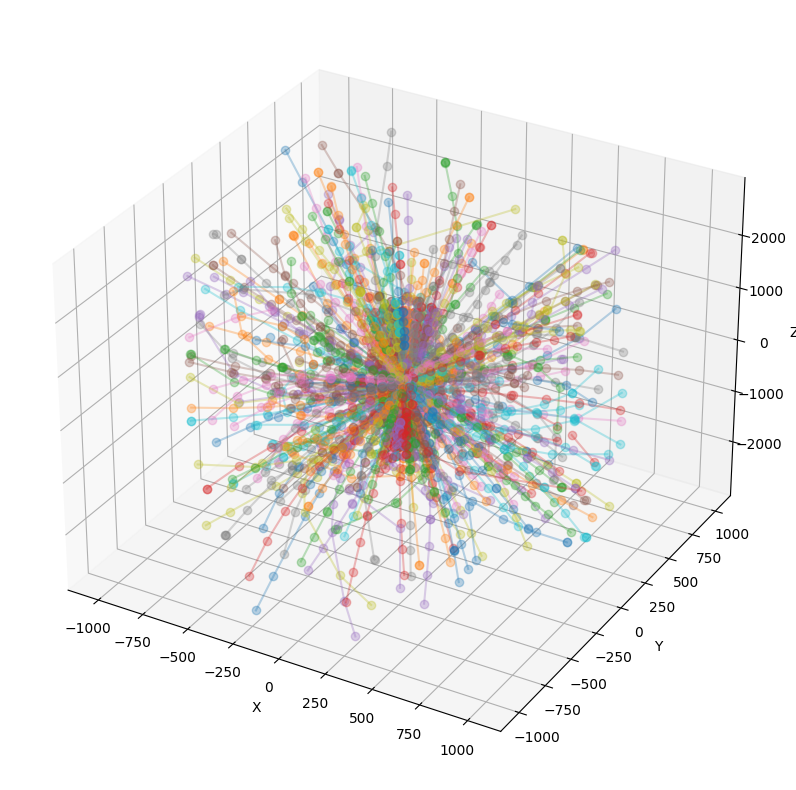

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for track_id, group in merged.groupby('particle_id'):
    # Sort the group by hit 'z'
    group = group.sort_values(by='z') 

    # Plotting each track
    ax.plot(group['x'], group['y'], group['z'], alpha=0.3, marker='o')

#ax.scatter(hit_x_values, hit_y_values, hit_z_values, s=20, alpha=0.2, color='blue', marker='o', linestyle='-')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [16]:
fig = go.Figure()

for track_id, group in merged.groupby('particle_id'):
    # Sort the group by hit 'z'
    group = group.sort_values(by='z') 

    # Add a trace for each track
    fig.add_trace(go.Scatter3d(
        x=group['x'],
        y=group['y'],
        z=group['z'],
        mode='lines+markers',
        line=dict(width=2),
        marker=dict(size=5),
        opacity=0.3
    ))

fig.update_layout(
    scene=dict(
        xaxis_title='X axis',
        yaxis_title='Y axis',
        zaxis_title='Z axis',
        aspectmode='manual',  # manually define aspect ratio
        aspectratio=dict(x=1.5, y=1.5, z=1)
    ),
    title='3D Plot of Tracks'
)

fig.show()

In [ ]:
# 29999 - 21000 = 8999 events

In [62]:
event_id = 21000
data_path = './trackml/raw'
hits_file = os.path.join(data_path, f'event0000{event_id}-hits.csv.gz')
particles_file = os.path.join(data_path, f'event0000{event_id}-particles.csv.gz')
truth_file = os.path.join(data_path, f'event0000{event_id}-truth.csv.gz')
hits_data = pd.read_csv(hits_file, header=0, compression='gzip')
particles_data = pd.read_csv(particles_file, header=0, compression='gzip')
truth_data = pd.read_csv(truth_file, header=0, compression='gzip')

In [63]:
hits_data

hit_id         x          y       z  volume_id  layer_id  module_id
0            1  -86.7962  -14.73040 -1502.5          7         2          1
1            2  -68.7035  -10.89900 -1502.5          7         2          1
2            3  -56.1383   -9.50887 -1502.5          7         2          1
3            4  -60.3114   -4.97231 -1502.5          7         2          1
4            5  -89.4057   -8.81687 -1502.5          7         2          1
...        ...       ...        ...     ...        ...       ...        ...
125571  125572 -752.1660   71.00610  2944.5         18        12         97
125572  125573 -826.3960   51.57930  2944.5         18        12         97
125573  125574 -884.3330  118.04100  2952.5         18        12         98
125574  125575 -987.7320  130.85800  2952.5         18        12         98
125575  125576 -926.3450  112.80800  2952.5         18        12         98

[125576 rows x 7 columns]

In [64]:
hits_data.shape

(125576, 7)

In [65]:
particles_data.shape

(12670, 10)

In [66]:
truth_data.shape

(125576, 9)

In [67]:
# take the data corresponding to only 200 particles
sampled_particle_ids = particles_data['particle_id'].unique().tolist()[:200]
indices = particles_data['particle_id'].isin(sampled_particle_ids)
particles_data = particles_data[indices]

In [68]:
particles_data

particle_id  particle_type        vx        vy        vz         px  \
0    4503668346847232           -211  0.040512  0.027287   6.03927  -0.505992   
1    4503805785800704            321  0.040512  0.027287   6.03927  30.096700   
2    4503874505277440            211  0.040512  0.027287   6.03927  24.123200   
3    4503943224754176           -211  0.040512  0.027287   6.03927   0.634312   
4    4504011944230912            321  0.040512  0.027287   6.03927   2.902970   
..                ...            ...       ...       ...       ...        ...   
195  4520435899170816            211 -4.560460  1.273050  87.68000   0.119547   
196  4520985654984704            211  0.040512  0.027287   6.03927  -0.241961   
197  4521054374461440           -211  0.040512  0.027287   6.03927  -0.062931   
198  4521123093938176            211  0.040512  0.027287   6.03927  -0.106356   
199  4521191813414912           -211  0.040512  0.027287   6.03927  -0.163873   

           py          pz  q  nhits  
0   -1.595230    1.728730 -1     11  
1    8.197130  109.326000  1     10  
2    6.502430   88.157500  1     10  
3   -0.058675    2.102420 -1     12  
4    1.100720    9.260090  1     13  
..        ...         ... ..    ...  
195 -0.083614    0.268936  1      1  
196 -0.300440    5.263640  1     11  
197  0.079600    2.616310 -1      0  
198  0.038025    0.506077  1      0  
199 -0.202810    1.447530 -1     13  

[200 rows x 10 columns]

(array([46., 13.,  4., 14.,  6., 16., 34., 24., 37.,  6.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

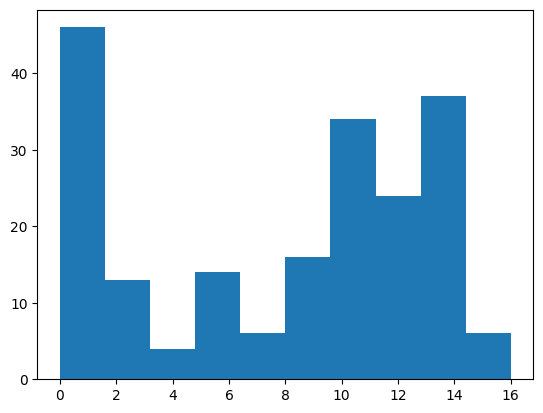

In [69]:
plt.hist(particles_data['nhits'], bins=10)

In [70]:
indices = particles_data['particle_id'].isin(truth_data['particle_id'])
particles_data = particles_data[indices]
particles_data.shape

(174, 10)

In [77]:
merged = hits_data.merge(truth_data, left_on='hit_id', right_on='hit_id')
merged = merged.merge(particles_data, left_on='particle_id', right_on='particle_id')
merged

hit_id          x          y       z  volume_id  layer_id  module_id  \
0        136  -124.4520   -85.5850 -1502.0          7         2         11   
1       1727  -107.3770   -75.1006 -1302.0          7         4         11   
2       3620   -90.5351   -64.3412 -1102.0          7         6         11   
3       3679   -90.2065   -64.0855 -1098.0          7         6         13   
4       5877   -78.4702   -56.3844  -957.5          7         8          9   
...      ...        ...        ...     ...        ...       ...        ...   
1558  112014   -10.1400  1014.8000 -1222.5         16        12         74   
1559  112023   -24.9846   880.2510 -1217.5         16        12         75   
1560  113721   807.5250   156.2750  -417.4         17         2        784   
1561  119001  1020.7800   -24.0362  -374.2         17         4        988   
1562  114681  -814.8000    95.3906   -65.2         17         2       1198   

           particle_id         tx         ty  ...    weight  particle_type  \
0     4508753588125696  -124.4390   -85.5901  ...  0.000008           2212   
1     4508753588125696  -107.3890   -75.0844  ...  0.000006           2212   
2     4508753588125696   -90.5361   -64.3220  ...  0.000005           2212   
3     4508753588125696   -90.2009   -64.1043  ...  0.000005           2212   
4     4508753588125696   -78.4613   -56.4055  ...  0.000006           2212   
...                ...        ...        ...  ...       ...            ...   
1558  4511708542406657   -10.1369  1015.2700  ...  0.000000           2212   
1559  4511708542418946   -25.0014   880.4670  ...  0.000000           2212   
1560  4517068661600258   807.5250   156.2920  ...  0.000000           2212   
1561  4517068661600258  1020.7800   -24.0432  ...  0.000000           2212   
1562  4504630436302849  -814.7970    95.4015  ...  0.000000           -211   

              vx          vy          vz        px        py        pz  q  \
0       0.040512    0.027287     6.03927 -0.619950 -0.480073 -7.794300  1   
1       0.040512    0.027287     6.03927 -0.619950 -0.480073 -7.794300  1   
2       0.040512    0.027287     6.03927 -0.619950 -0.480073 -7.794300  1   
3       0.040512    0.027287     6.03927 -0.619950 -0.480073 -7.794300  1   
4       0.040512    0.027287     6.03927 -0.619950 -0.480073 -7.794300  1   
...          ...         ...         ...       ...       ...       ... ..   
1558  -12.073200  884.631000 -1181.87000 -0.032509  0.393841 -0.122793  1   
1559  -12.073200  884.631000 -1181.87000 -0.097984 -0.035965 -0.274961  1   
1560  185.953000 -175.060000  -548.36900  0.056208  0.269548  0.043891  1   
1561  185.953000 -175.060000  -548.36900  0.056208  0.269548  0.043891  1   
1562 -136.845000 -218.909000   752.19400 -0.078288  0.280398 -0.281470 -1   

      nhits  
0        14  
1        14  
2        14  
3        14  
4        14  
...     ...  
1558      1  
1559      1  
1560      2  
1561      2  
1562      1  

[1563 rows x 24 columns]

In [78]:
indices = merged['nhits'] > 5
merged = merged[indices]
merged

hit_id          x         y       z  volume_id  layer_id  module_id  \
0        136  -124.4520  -85.5850 -1502.0          7         2         11   
1       1727  -107.3770  -75.1006 -1302.0          7         4         11   
2       3620   -90.5351  -64.3412 -1102.0          7         6         11   
3       3679   -90.2065  -64.0855 -1098.0          7         6         13   
4       5877   -78.4702  -56.3844  -957.5          7         8          9   
...      ...        ...       ...     ...        ...       ...        ...   
1547   94946  -449.9340  219.6580   807.8         13         6       1477   
1548  100550  -617.6770  238.3240   760.0         13         8       1830   
1549  100555  -610.7410  238.2710   761.2         13         8       1831   
1550  116823  -790.4060  220.4840   715.6         17         2       2155   
1551  121764 -1014.5100  135.1290   645.0         17         4       2581   

           particle_id         tx        ty  ...    weight  particle_type  \
0     4508753588125696  -124.4390  -85.5901  ...  0.000008           2212   
1     4508753588125696  -107.3890  -75.0844  ...  0.000006           2212   
2     4508753588125696   -90.5361  -64.3220  ...  0.000005           2212   
3     4508753588125696   -90.2009  -64.1043  ...  0.000005           2212   
4     4508753588125696   -78.4613  -56.4055  ...  0.000006           2212   
...                ...        ...       ...  ...       ...            ...   
1547  4517618417410050  -449.9470  219.6380  ...  0.000000           -211   
1548  4517618417410050  -617.6760  238.3260  ...  0.000000           -211   
1549  4517618417410050  -610.7450  238.2640  ...  0.000000           -211   
1550  4517618417410050  -790.4260  220.4410  ...  0.000000           -211   
1551  4517618417410050 -1014.5100  135.1330  ...  0.000000           -211   

              vx          vy         vz        px        py        pz  q  \
0       0.040512    0.027287    6.03927 -0.619950 -0.480073 -7.794300  1   
1       0.040512    0.027287    6.03927 -0.619950 -0.480073 -7.794300  1   
2       0.040512    0.027287    6.03927 -0.619950 -0.480073 -7.794300  1   
3       0.040512    0.027287    6.03927 -0.619950 -0.480073 -7.794300  1   
4       0.040512    0.027287    6.03927 -0.619950 -0.480073 -7.794300  1   
...          ...         ...        ...       ...       ...       ... ..   
1547 -222.492000  132.590000  876.05000 -0.421257  0.234788 -0.134558 -1   
1548 -222.492000  132.590000  876.05000 -0.421257  0.234788 -0.134558 -1   
1549 -222.492000  132.590000  876.05000 -0.421257  0.234788 -0.134558 -1   
1550 -222.492000  132.590000  876.05000 -0.421257  0.234788 -0.134558 -1   
1551 -222.492000  132.590000  876.05000 -0.421257  0.234788 -0.134558 -1   

      nhits  
0        14  
1        14  
2        14  
3        14  
4        14  
...     ...  
1547      7  
1548      7  
1549      7  
1550      7  
1551      7  

[1474 rows x 24 columns]

In [80]:
merged = merged[["x", "y", "z", "volume_id", "vx", "vy", "vz", "px", "py", "pz", "q", "particle_id", "weight"]]

In [81]:
merged['event_id'] = event_id

In [82]:
# write it to a file
merged.to_csv('./trackml/data.csv', mode='a', index=False, header=False)

In [87]:
!rm ./trackml/data.csv

In [88]:
def transform_trackml_data(event_id):
    data_path = './trackml/raw'
    hits_file = os.path.join(data_path, f'event0000{event_id}-hits.csv.gz')
    particles_file = os.path.join(data_path, f'event0000{event_id}-particles.csv.gz')
    truth_file = os.path.join(data_path, f'event0000{event_id}-truth.csv.gz')
    hits_data = pd.read_csv(hits_file, header=0, compression='gzip')
    particles_data = pd.read_csv(particles_file, header=0, compression='gzip')
    truth_data = pd.read_csv(truth_file, header=0, compression='gzip')

    # take the data corresponding to only 200 particles
    sampled_particle_ids = particles_data['particle_id'].unique().tolist()[:200]
    indices = particles_data['particle_id'].isin(sampled_particle_ids)
    particles_data = particles_data[indices]

    indices = truth_data['particle_id'].isin(particles_data["particle_id"])
    truth_data = truth_data[indices]
    hits_data = hits_data[indices]

    '''
    # take only those hits that are in the inner detector range
    indices = hits_data['volume_id'] <= 9
    hits_data = hits_data[indices]
    truth_data = truth_data[indices]
    '''

    indices = particles_data['particle_id'].isin(truth_data['particle_id'])
    particles_data = particles_data[indices]

    # merge dataframes into a single one
    merged = hits_data.merge(truth_data, left_on='hit_id', right_on='hit_id')
    merged = merged.merge(particles_data, left_on='particle_id', right_on='particle_id')
    
    # filtering out tracks with 5 hits or less
    indices = merged['nhits'] > 5
    merged = merged[indices]

    merged = merged[["x", "y", "z", "volume_id", "vx", "vy", "vz", "px", "py", "pz", "q", "particle_id", "weight"]]
    merged['event_id'] = event_id

    # write it to a file
    merged.to_csv('./trackml/data.csv', mode='a', index=False, header=False)

In [89]:
# Loop through all event IDs
for event_id in range(21000, 30000):
    
    try:
        transform_trackml_data(event_id)
    except FileNotFoundError:
        print(f"File for event {event_id} not found.")
        continue
    except Exception as e:
        print(f"An error occurred while processing event {event_id}: {e}")
        continue

File for event 21400 not found.
File for event 21401 not found.
File for event 21402 not found.
File for event 21403 not found.
File for event 21404 not found.
File for event 21405 not found.
File for event 21406 not found.
File for event 21407 not found.
File for event 21408 not found.
File for event 21409 not found.
File for event 21410 not found.
File for event 21411 not found.
File for event 21412 not found.
File for event 21413 not found.
File for event 21414 not found.
File for event 21415 not found.
File for event 21416 not found.
File for event 21417 not found.
File for event 21418 not found.
File for event 21419 not found.
File for event 21420 not found.
File for event 21421 not found.
File for event 21422 not found.
File for event 21423 not found.
File for event 21424 not found.
File for event 21425 not found.
File for event 21426 not found.
File for event 21427 not found.
File for event 21428 not found.
File for event 21429 not found.
File for event 21430 not found.
File for